# BMI 500 Model-based Machine Learning
Alireza Rafiei - Fall 2022 - HW11

In [1]:
# Import required libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def vectorfield(w, t, c):
    """
    Defines the differential equations for both compartmental pandemic models.

    Arguments:
        w :  vector of the state variables:
                  w = [s,e,i,r,p]
        t :  time
        p :  vector of the parameters:
                  p = [alpha_e,alpha_i,gamma,kappa,ro,beta,mo]
    Output:
        model:   differential equations
    """
    s,e,i,r,p = w
    alpha_e,alpha_i,gamma,kappa,ro,beta,mo = c

    # Create f = (s',p',i',r',p'):
    model = [-(alpha_e*s*e)-(alpha_i*s*i)+(gamma*r),
         (alpha_e*s*e)+(alpha_i*s*i)-(kappa*e)-(ro*e),
         (kappa*e)-(beta*i)-(mo*i),
         (beta*i)+(ro*e)-(gamma*r),
         (mo*i)]

    return model

In [3]:
def ODE_solver(alpha_e, alpha_i, gamma, kappa, ro, beta, mo, s, e, i, r, p, days):
    """
    Use ODEINT to solve the differential equations defined by the vectorfield.

    Arguments:
        alpha_e, alpha_i, gamma, kappa, ro, beta, mo : Parameter values
        s, e, i, r, p : Initial conditions
        days : number of days for simulation
    Output:
        t, s, e, i, r, p: Simulation time and the resulted sunction
    """

    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6
    stoptime = days
    numpoints = days*20

    # Create the time samples for the output of the ODE solver.
    t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

    # Pack up the parameters and initial conditions
    c = [alpha_e,alpha_i,gamma,kappa,ro,beta,mo]
    w0 = [s,e,i,r,p]

    # Call the ODE solver.
    wsol = odeint(vectorfield, w0, t,args=(c,),
                  atol=abserr, rtol=relerr)
    # Gathering the results
    s = []
    e = []
    i = []
    r = []
    p = []
    for t1, w1 in zip(t, wsol):
            t1 = t
            s.append(w1[0])
            e.append(w1[1])
            i.append(w1[2])
            r.append(w1[3])
            p.append(w1[4])
            
    return t, s, e, i, r, p

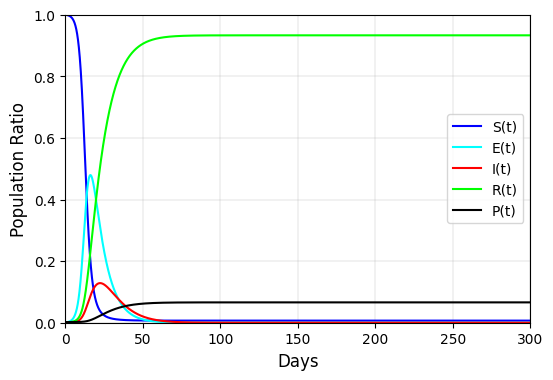

In [4]:
# Example 4 (Life-time immune case)

# Parameter values
alpha_e = 0.65
alpha_i = 0.005
gamma = 0
kappa = 0.05
ro = 0.08
beta = 0.1
mo = 0.02

# Initial conditions
s = 1
e = 0.001
i = 0.002
r = 0.001
p = 0.002

days = 300

t, s, e, i, r, p = ODE_solver(alpha_e, alpha_i, gamma, kappa, ro, beta, mo, s, e, i, r, p, days)

plt.figure(figsize=(6, 4))
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Population Ratio', fontsize = 12)
plt.xlim([0,days])
plt.ylim([0,1])
plt.grid(linewidth=0.25)

plt.plot(t, s, 'b')
plt.plot(t, e, 'aqua')
plt.plot(t, i, 'r')
plt.plot(t, r, 'lime')
plt.plot(t, p, 'k')

plt.legend(('S(t)','E(t)','I(t)','R(t)','P(t)'))

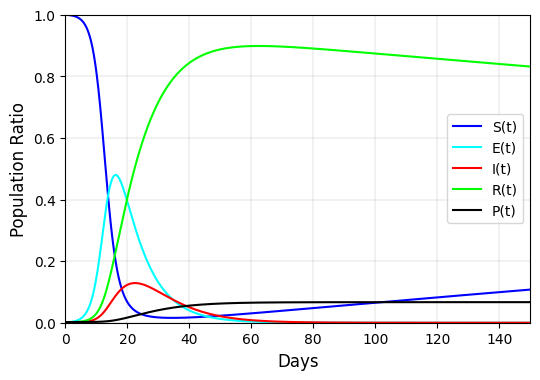

<Figure size 600x400 with 0 Axes>

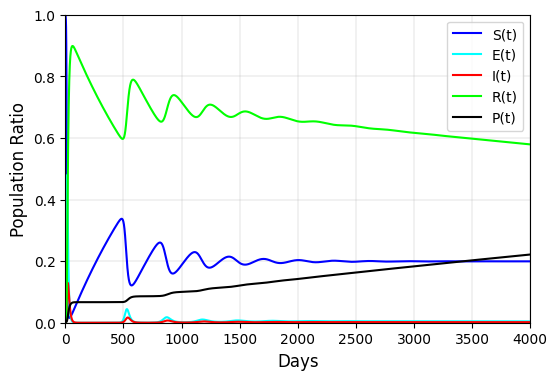

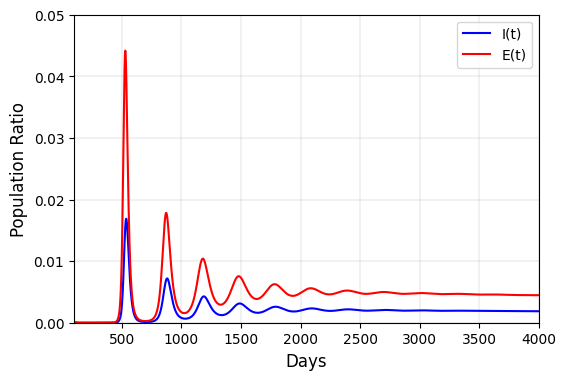

In [5]:
# Example 5 (Recurrent epidemic)

# Parameter values
alpha_e = 0.65
alpha_i = 0.005
gamma = 0.001
kappa = 0.05
ro = 0.08
beta = 0.1
mo = 0.02

# Initial conditions
s = 1
e = 0.001
i = 0.002
r = 0.001
p = 0.002

# Fig.9 (a) paper
days = 150

t, s, e, i, r, p = ODE_solver(alpha_e, alpha_i, gamma, kappa, ro, beta, mo, s, e, i, r, p, days)

plt.figure(1, figsize=(6, 4))
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Population Ratio', fontsize = 12)
plt.xlim([0,days])
plt.ylim([0,1])
plt.grid(linewidth=0.25)

plt.plot(t, s, 'b')
plt.plot(t, e, 'aqua')
plt.plot(t, i, 'r')
plt.plot(t, r, 'lime')
plt.plot(t, p, 'k')

plt.legend(('S(t)','E(t)','I(t)','R(t)','P(t)'))

# Fig.9 (b) paper
days = 4000

# Initial conditions
s = 1
e = 0.001
i = 0.002
r = 0.001
p = 0.002

t, s, e, i, r, p = ODE_solver(alpha_e, alpha_i, gamma, kappa, ro, beta, mo, s, e, i, r, p, days)

plt.figure(2, figsize=(6, 4))

plt.figure(figsize=(6, 4))
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Population Ratio', fontsize = 12)
plt.xlim([0,days])
plt.ylim([0,1])
plt.grid(linewidth=0.25)

plt.plot(t, s, 'b')
plt.plot(t, e, 'aqua')
plt.plot(t, i, 'r')
plt.plot(t, r, 'lime')
plt.plot(t, p, 'k')

plt.legend(('S(t)','E(t)','I(t)','R(t)','P(t)'))

# Fig.9 (c) paper
days = 4000

# Initial conditions
s = 1
e = 0.001
i = 0.002
r = 0.001
p = 0.002

t, s, e, i, r, p = ODE_solver(alpha_e, alpha_i, gamma, kappa, ro, beta, mo, s, e, i, r, p, days)

plt.figure(3, figsize=(6, 4))

plt.figure(figsize=(6, 4))
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Population Ratio', fontsize = 12)
plt.xlim([100,days])
plt.ylim([0,0.05])
plt.grid(linewidth=0.25)

plt.plot(t, i, 'b')
plt.plot(t, e, 'r')

plt.legend(('I(t)','E(t)'))